# Classifying Medical Texts
This notebook will use various vectorizers and classifiers such tfidf and logistic regression to classify transcriptions of medical notes and text into various areas of medicine. The text has already been prepared and split into training and test sets.

## Setup and Load

In [49]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import spacy
import random
import gensim
import re

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Springboard\\Capstone 3'

In [4]:
path = 'C:\\Users\\Shru\\Documents\\Springboard\\Capstone 3/data'

train = pd.read_csv(path+'/trainingset.tsv', delimiter='\t')
test = pd.read_csv(path+'/testset.tsv', delimiter='\t')
data1 = pd.read_csv(path+'/datafull.tsv', delimiter='\t')
data2 = pd.read_csv(path+'/datafull_nolemma.tsv', delimiter='\t')

In [5]:
data2.head()

,medical_specialty,text,class_label,tokens
0,Allergy / Immunology,subjective 23yearold white female presents com...,0,"['subjective', '23yearold', 'white', 'female',..."
1,Bariatrics,past medical history difficulty climbing stair...,2,"['past', 'medical', 'history', 'difficulty', '..."
2,Bariatrics,history present illness seen abc today pleasan...,2,"['history', 'present', 'illness', 'seen', 'abc..."
3,Cardiovascular / Pulmonary,2d mmode 1 left atrial enlargement left atrial...,3,"['2d', 'mmode', '1', 'left', 'atrial', 'enlarg..."
4,Cardiovascular / Pulmonary,1 left ventricular cavity size wall thickness ...,3,"['1', 'left', 'ventricular', 'cavity', 'size',..."


In [6]:
data1.head()

,medical_specialty,text,class_label,tokens
0,Allergy / Immunology,subjective 23year old white female present com...,0,"['subjective', '23year', 'old', 'white', 'fema..."
1,Bariatrics,past medical history difficulty climb stair di...,2,"['past', 'medical', 'history', 'difficulty', '..."
2,Bariatrics,history present illness see abc today pleasant...,2,"['history', 'present', 'illness', 'see', 'abc'..."
3,Cardiovascular / Pulmonary,2d mode 1 leave atrial enlargement left atrial...,3,"['2d', 'mode', '1', 'leave', 'atrial', 'enlarg..."
4,Cardiovascular / Pulmonary,1 left ventricular cavity size wall thickness ...,3,"['1', 'left', 'ventricular', 'cavity', 'size',..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   medical_specialty  4966 non-null   object
 1   text               4966 non-null   object
 2   class_label        4966 non-null   int64 
 3   tokens             4966 non-null   object
dtypes: int64(1), object(3)
memory usage: 155.3+ KB


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split

In [8]:
def get_metrics(y_test, y_predicted):  

    precision = precision_score(y_test, y_predicted, average='weighted')             

    recall = recall_score(y_test, y_predicted, average='weighted')
    
    f1 = f1_score(y_test, y_predicted, average='weighted')
    
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

def BOW(data):

    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(data['text'])

    list_corpus = data["text"].tolist()
    list_labels = data["class_label"].tolist()
    
    X = count_vectorizer.transform(list_corpus)
    
    return X, list_labels

def tfidf(data, ngrams_l = 1, ngrams_u = 1):
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(ngrams_l, ngrams_u))
    tfidf_vectorizer.fit(data['text'])

    list_corpus = data["text"].tolist()
    list_labels = data["class_label"].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels

## Logistic Regression Model with BOW and TF-IDF

In [8]:
df_res = pd.DataFrame(columns = ['Preprocessing', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

In [9]:
clf1 = LogisticRegression(solver='saga', random_state=42)

In [10]:
X, y = BOW(data2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'BOW', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [12]:
X, y = tfidf(data2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [14]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.112694,0.110664,0.109724,0.110664
1,TF-IDF 1-gram,0.187132,0.264588,0.211470,0.264588


Neither vectorizer is doing well with logistic regression. Model tuning parameters include learning rates, ngrams, and regularization.

### Model optimization

#### Testing ngrams
Trying ngrams 1 to 2, 1 to 3, and 2 to 3

In [16]:
X, y = tfidf(data2,ngrams_u=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 2-gram', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [17]:
X, y = tfidf(data2,ngrams_u=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 3-gram', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [18]:
X, y = tfidf(data2,ngrams_l=2, ngrams_u=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 2,3-gram',
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [19]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.112694,0.110664,0.109724,0.110664
1,TF-IDF 1-gram,0.187132,0.264588,0.211470,0.264588
2,TF-IDF 2-gram,0.153547,0.261569,0.187451,0.261569
3,TF-IDF 3-gram,0.137679,0.253521,0.173148,0.253521
4,"TF-IDF 2,3-gram",0.108094,0.244467,0.147581,0.244467


#### Testing regularization of the logistic regression model
Adjusting the penalty and class_weight parameters

In [9]:
clf2 = LogisticRegression(penalty='l1',solver='saga', random_state=42)

In [22]:
X, y = tfidf(data2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram, l1 penalty', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [23]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.112694,0.110664,0.109724,0.110664
1,TF-IDF 1-gram,0.187132,0.264588,0.211470,0.264588
2,TF-IDF 2-gram,0.153547,0.261569,0.187451,0.261569
3,TF-IDF 3-gram,0.137679,0.253521,0.173148,0.253521
4,"TF-IDF 2,3-gram",0.108094,0.244467,0.147581,0.244467
5,"TF-IDF 1-gram, l1 penalty",0.341730,0.367203,0.335524,0.367203


#### PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA()

In [25]:
X, y = tfidf(data2)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram, PCA, l1 penalty', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [26]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.112694,0.110664,0.109724,0.110664
1,TF-IDF 1-gram,0.187132,0.264588,0.211470,0.264588
2,TF-IDF 2-gram,0.153547,0.261569,0.187451,0.261569
3,TF-IDF 3-gram,0.137679,0.253521,0.173148,0.253521
4,"TF-IDF 2,3-gram",0.108094,0.244467,0.147581,0.244467
5,"TF-IDF 1-gram, l1 penalty",0.341730,0.367203,0.335524,0.367203
6,"TF-IDF 1-gram, PCA, l1 penalty",0.363791,0.393360,0.358753,0.393360


### LogReg with word2vec

In [27]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [28]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

def w2v(data):

    embeddings = get_word2vec_embeddings(word2vec, data)
    list_labels = data["class_label"].tolist()
    
    return embeddings, list_labels

In [29]:
X, y = w2v(data2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing': 'Word2vec, l1 penalty',
                       'Precision': precision,
                       'Recall': recall,
                       'F1-score': f1,
                       'Accuracy': accuracy}, ignore_index = True)

In [30]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.112694,0.110664,0.109724,0.110664
1,TF-IDF 1-gram,0.187132,0.264588,0.211470,0.264588
2,TF-IDF 2-gram,0.153547,0.261569,0.187451,0.261569
3,TF-IDF 3-gram,0.137679,0.253521,0.173148,0.253521
4,"TF-IDF 2,3-gram",0.108094,0.244467,0.147581,0.244467
5,"TF-IDF 1-gram, l1 penalty",0.341730,0.367203,0.335524,0.367203
6,"TF-IDF 1-gram, PCA, l1 penalty",0.363791,0.393360,0.358753,0.393360
7,"Word2vec, l1 penalty",0.092882,0.276660,0.136381,0.276660


## Adjustment for imbalances
We need to deal with the class imbalances the best we can. For now simply aggregating the lower classes into one will do. One could combine classes based on domain knowledge. We might do that later.

In [12]:
counts = data2['medical_specialty'].value_counts()
data_adj = data2.copy(deep=True)
data_adj.loc[data_adj['medical_specialty'].isin(counts[counts<100].index), 'medical_specialty'] = ' Other Specialties'

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
data_adj['labels'] = LabelEncoder().fit_transform(data_adj['medical_specialty'])

In [15]:
data_adj['medical_specialty'].value_counts()

 Surgery                          1088
 Other Specialties                1072
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
Name: medical_specialty, dtype: int64

In [56]:
data_adj['labels'].value_counts()

11    1088
8     1072
1      516
0      371
7      355
9      273
4      259
3      224
5      223
10     166
12     156
6      155
2      108
Name: labels, dtype: int64

In [59]:
list(data_adj['medical_specialty'].unique())

[' Other Specialties',
 ' Cardiovascular / Pulmonary',
 ' Neurology',
 ' Urology',
 ' General Medicine',
 ' Surgery',
 ' SOAP / Chart / Progress Notes',
 ' Radiology',
 ' Orthopedic',
 ' Obstetrics / Gynecology',
 ' Gastroenterology',
 ' Discharge Summary',
 ' Consult - History and Phy.']

### Try class_weight parameter in model to help account for data imbalances on tf-idf 1-gram, pca

In [39]:
clf3 = LogisticRegression(penalty='l1',solver='saga', class_weight='balanced', random_state=42)

In [40]:
X, y = tfidf(data2)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram, PCA, l1 penalty, balanced weighting', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [49]:
clf4 = LogisticRegression(solver='saga', class_weight='balanced', random_state=42)

In [50]:
X, y = tfidf(data2)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf4.fit(X_train, y_train)
y_pred = clf4.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Preprocessing':'TF-IDF 1-gram, PCA, balanced weighting', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [51]:
df_res

,Preprocessing,Precision,Recall,F1-score,Accuracy
0,BOW,0.112694,0.110664,0.109724,0.110664
1,TF-IDF 1-gram,0.187132,0.264588,0.211470,0.264588
2,TF-IDF 2-gram,0.153547,0.261569,0.187451,0.261569
3,TF-IDF 3-gram,0.137679,0.253521,0.173148,0.253521
4,"TF-IDF 2,3-gram",0.108094,0.244467,0.147581,0.244467
5,"TF-IDF 1-gram, l1 penalty",0.341730,0.367203,0.335524,0.367203
6,"TF-IDF 1-gram, PCA, l1 penalty",0.363791,0.393360,0.358753,0.393360
7,"Word2vec, l1 penalty",0.092882,0.276660,0.136381,0.276660
8,"TF-IDF 1-gram, PCA, l1 penalty, balanced weigh...",0.401305,0.328974,0.298127,0.328974
9,"TF-IDF 1-gram, PCA, balanced weighting",0.303026,0.261569,0.235409,0.261569


# Find the Best Model on Adjusted Data

In [16]:
def tfidf_v2(data, ngrams_l = 1, ngrams_u = 1):
    
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(ngrams_l, ngrams_u))
    tfidf_vectorizer.fit(data['text'])

    list_corpus = data["text"].tolist()
    list_labels = data["labels"].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels

def w2v_v2(data):

    embeddings = get_word2vec_embeddings(word2vec, data)
    list_labels = data["labels"].tolist()
    
    return embeddings, list_labels

In [86]:
full_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

# Testing TF-IDF with 1-gram
X, y = tfidf_v2(data_adj)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
full_result = full_result.append({'Preprocessing':'TF-IDF 1-gram', 
                                'Model': 'Lasso LogReg',
                                'Precision': precision, 
                                'Recall': recall, 
                                'F1-score': f1, 
                                'Accuracy': accuracy}, ignore_index=True)

# Testing TF-IDF with 1-gram, PCA
X, y = tfidf_v2(data_adj)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
full_result = full_result.append({'Preprocessing':'TF-IDF 1-gram, PCA', 
                                'Model': 'Lasso LogReg',
                                'Precision': precision, 
                                'Recall': recall, 
                                'F1-score': f1, 
                                'Accuracy': accuracy}, ignore_index=True)

# Testing Word2vec
X, y = w2v_v2(data_adj)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
full_result = full_result.append({'Preprocessing': 'Word2vec',
                                'Model': 'Lasso LogReg',
                                'Precision': precision,
                                'Recall': recall,
                                'F1-score': f1,
                                'Accuracy': accuracy}, ignore_index = True)

full_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-gram,Lasso LogReg,0.372031,0.365191,0.355661,0.365191
1,"TF-IDF 1-gram, PCA",Lasso LogReg,0.384638,0.380282,0.372984,0.380282
2,Word2vec,Lasso LogReg,0.137965,0.297787,0.187787,0.297787


## Best Model Results

In [64]:
# set up best model
X, y = tfidf(data2)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [20]:
import itertools

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=10, rotation = 90)
    plt.yticks(tick_marks, classes, fontsize=10)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=15)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

    return plt

In [73]:
data2.groupby(['medical_specialty','class_label']).size().reset_index().rename(columns={0:'count'})

,medical_specialty,class_label,count
0,Allergy / Immunology,0,7
1,Autopsy,1,8
2,Bariatrics,2,18
3,Cardiovascular / Pulmonary,3,371
4,Chiropractic,4,14
5,Consult - History and Phy.,5,516
6,Cosmetic / Plastic Surgery,6,27
7,Dentistry,7,27
8,Dermatology,8,29
9,Diets and Nutritions,9,10


In [110]:
set(data2['medical_specialty'])

{' Allergy / Immunology',
 ' Autopsy',
 ' Bariatrics',
 ' Cardiovascular / Pulmonary',
 ' Chiropractic',
 ' Consult - History and Phy.',
 ' Cosmetic / Plastic Surgery',
 ' Dentistry',
 ' Dermatology',
 ' Diets and Nutritions',
 ' Discharge Summary',
 ' ENT - Otolaryngology',
 ' Emergency Room Reports',
 ' Endocrinology',
 ' Gastroenterology',
 ' General Medicine',
 ' Hematology - Oncology',
 ' Hospice - Palliative Care',
 ' IME-QME-Work Comp etc.',
 ' Lab Medicine - Pathology',
 ' Letters',
 ' Nephrology',
 ' Neurology',
 ' Neurosurgery',
 ' Obstetrics / Gynecology',
 ' Office Notes',
 ' Ophthalmology',
 ' Orthopedic',
 ' Pain Management',
 ' Pediatrics - Neonatal',
 ' Physical Medicine - Rehab',
 ' Podiatry',
 ' Psychiatry / Psychology',
 ' Radiology',
 ' Rheumatology',
 ' SOAP / Chart / Progress Notes',
 ' Sleep Medicine',
 ' Speech - Language',
 ' Surgery',
 ' Urology'}

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(16, 16))
plot = plot_confusion_matrix(cm, classes=set(data2['medical_specialty']), normalize=False, 
                             title='Confusion matrix')
plt.show()

In [119]:
from sklearn.metrics import plot_confusion_matrix

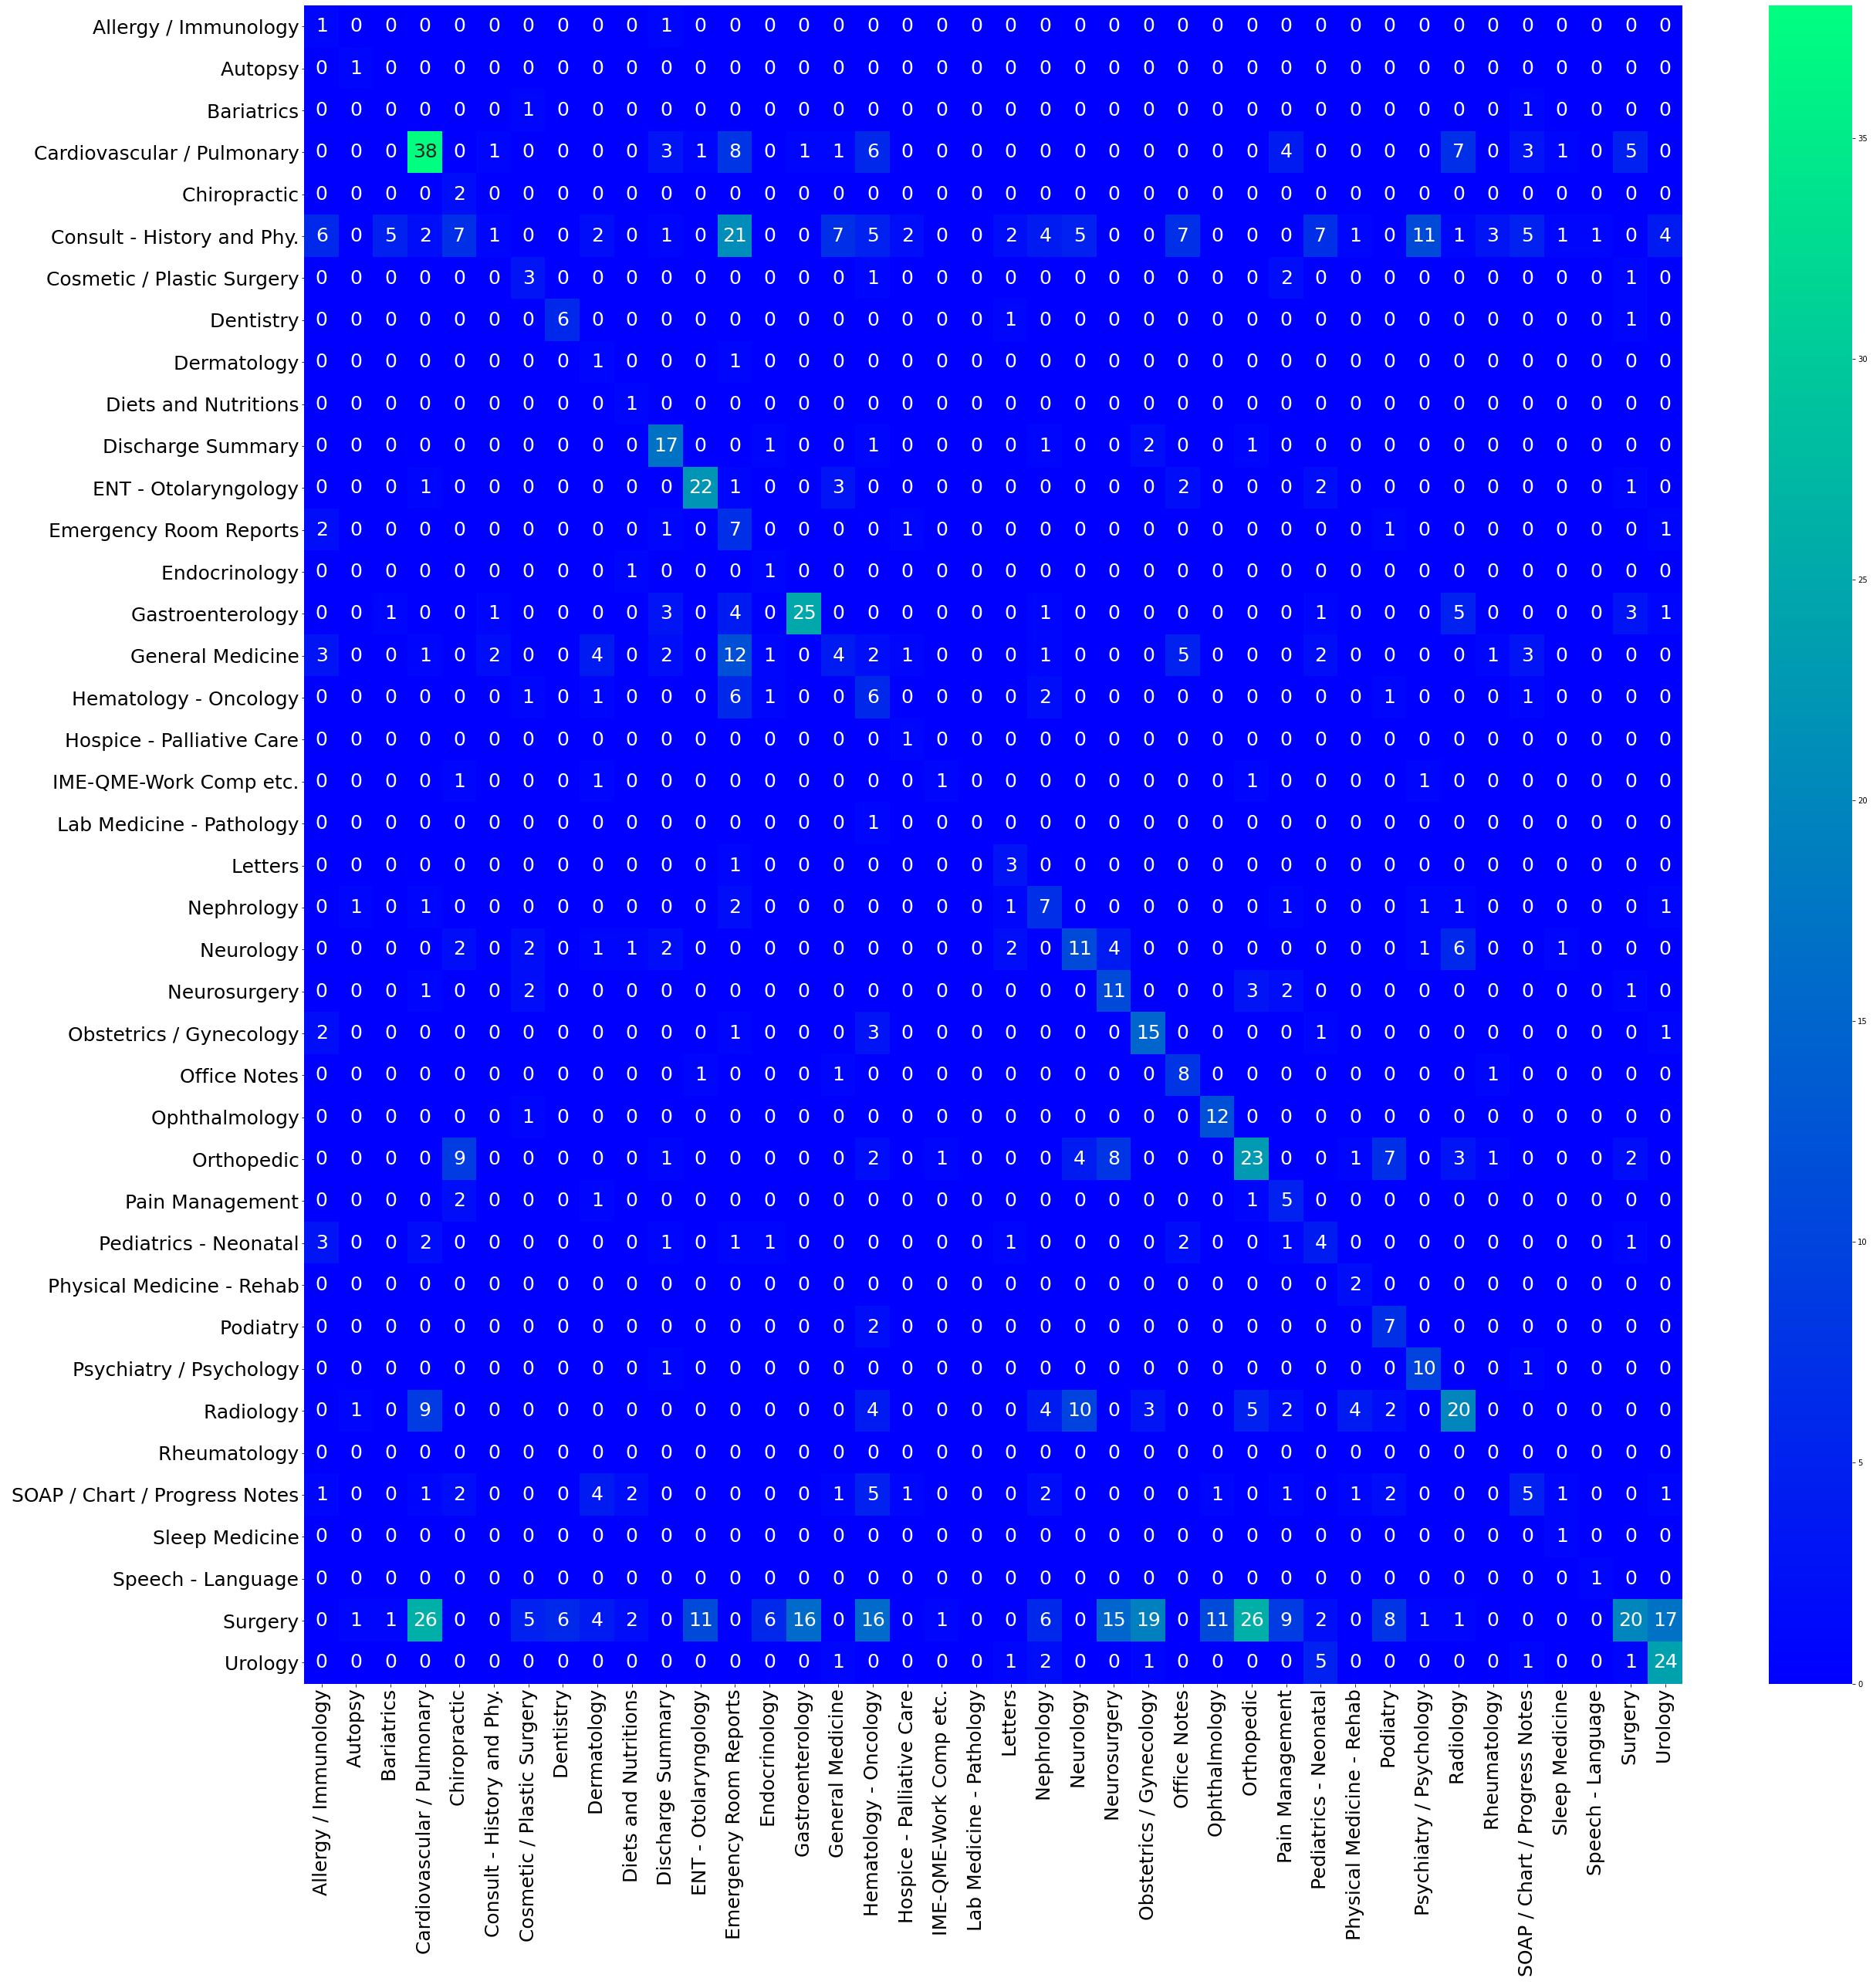

In [141]:
cm = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(figsize=(40, 40))
_ = sns.heatmap(cm, xticklabels=sorted(list(set(data2['medical_specialty']))), 
                yticklabels=sorted(list(set(data2['medical_specialty']))), 
                ax=ax, cmap=plt.cm.winter, annot=True, annot_kws={"fontsize":25})
_ = plt.xticks(fontsize=25)
_ = plt.yticks(fontsize=25)
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE

In [17]:
smote_over_sample = SMOTE(sampling_strategy='minority')
smote_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Accuracy'])

In [18]:
X, y = tfidf_v2(data_adj, ngrams_u = 1)
X, y = smote_over_sample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
smote_result = smote_result.append({'Preprocessing':'TF-IDF 1-gram', 
                                'Model': 'Lasso LogReg',
                                'Precision': precision, 
                                'Recall': recall, 
                                'F1-score': f1, 
                                'Accuracy': accuracy}, ignore_index=True)

In [19]:
X, y = tfidf_v2(data_adj, ngrams_u = 1)
X, y = smote_over_sample.fit_resample(X, y)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
smote_result = smote_result.append({'Preprocessing':'TF-IDF 1-gram, PCA', 
                                'Model': 'Lasso LogReg',
                                'Precision': precision, 
                                'Recall': recall, 
                                'F1-score': f1, 
                                'Accuracy': accuracy}, ignore_index=True)

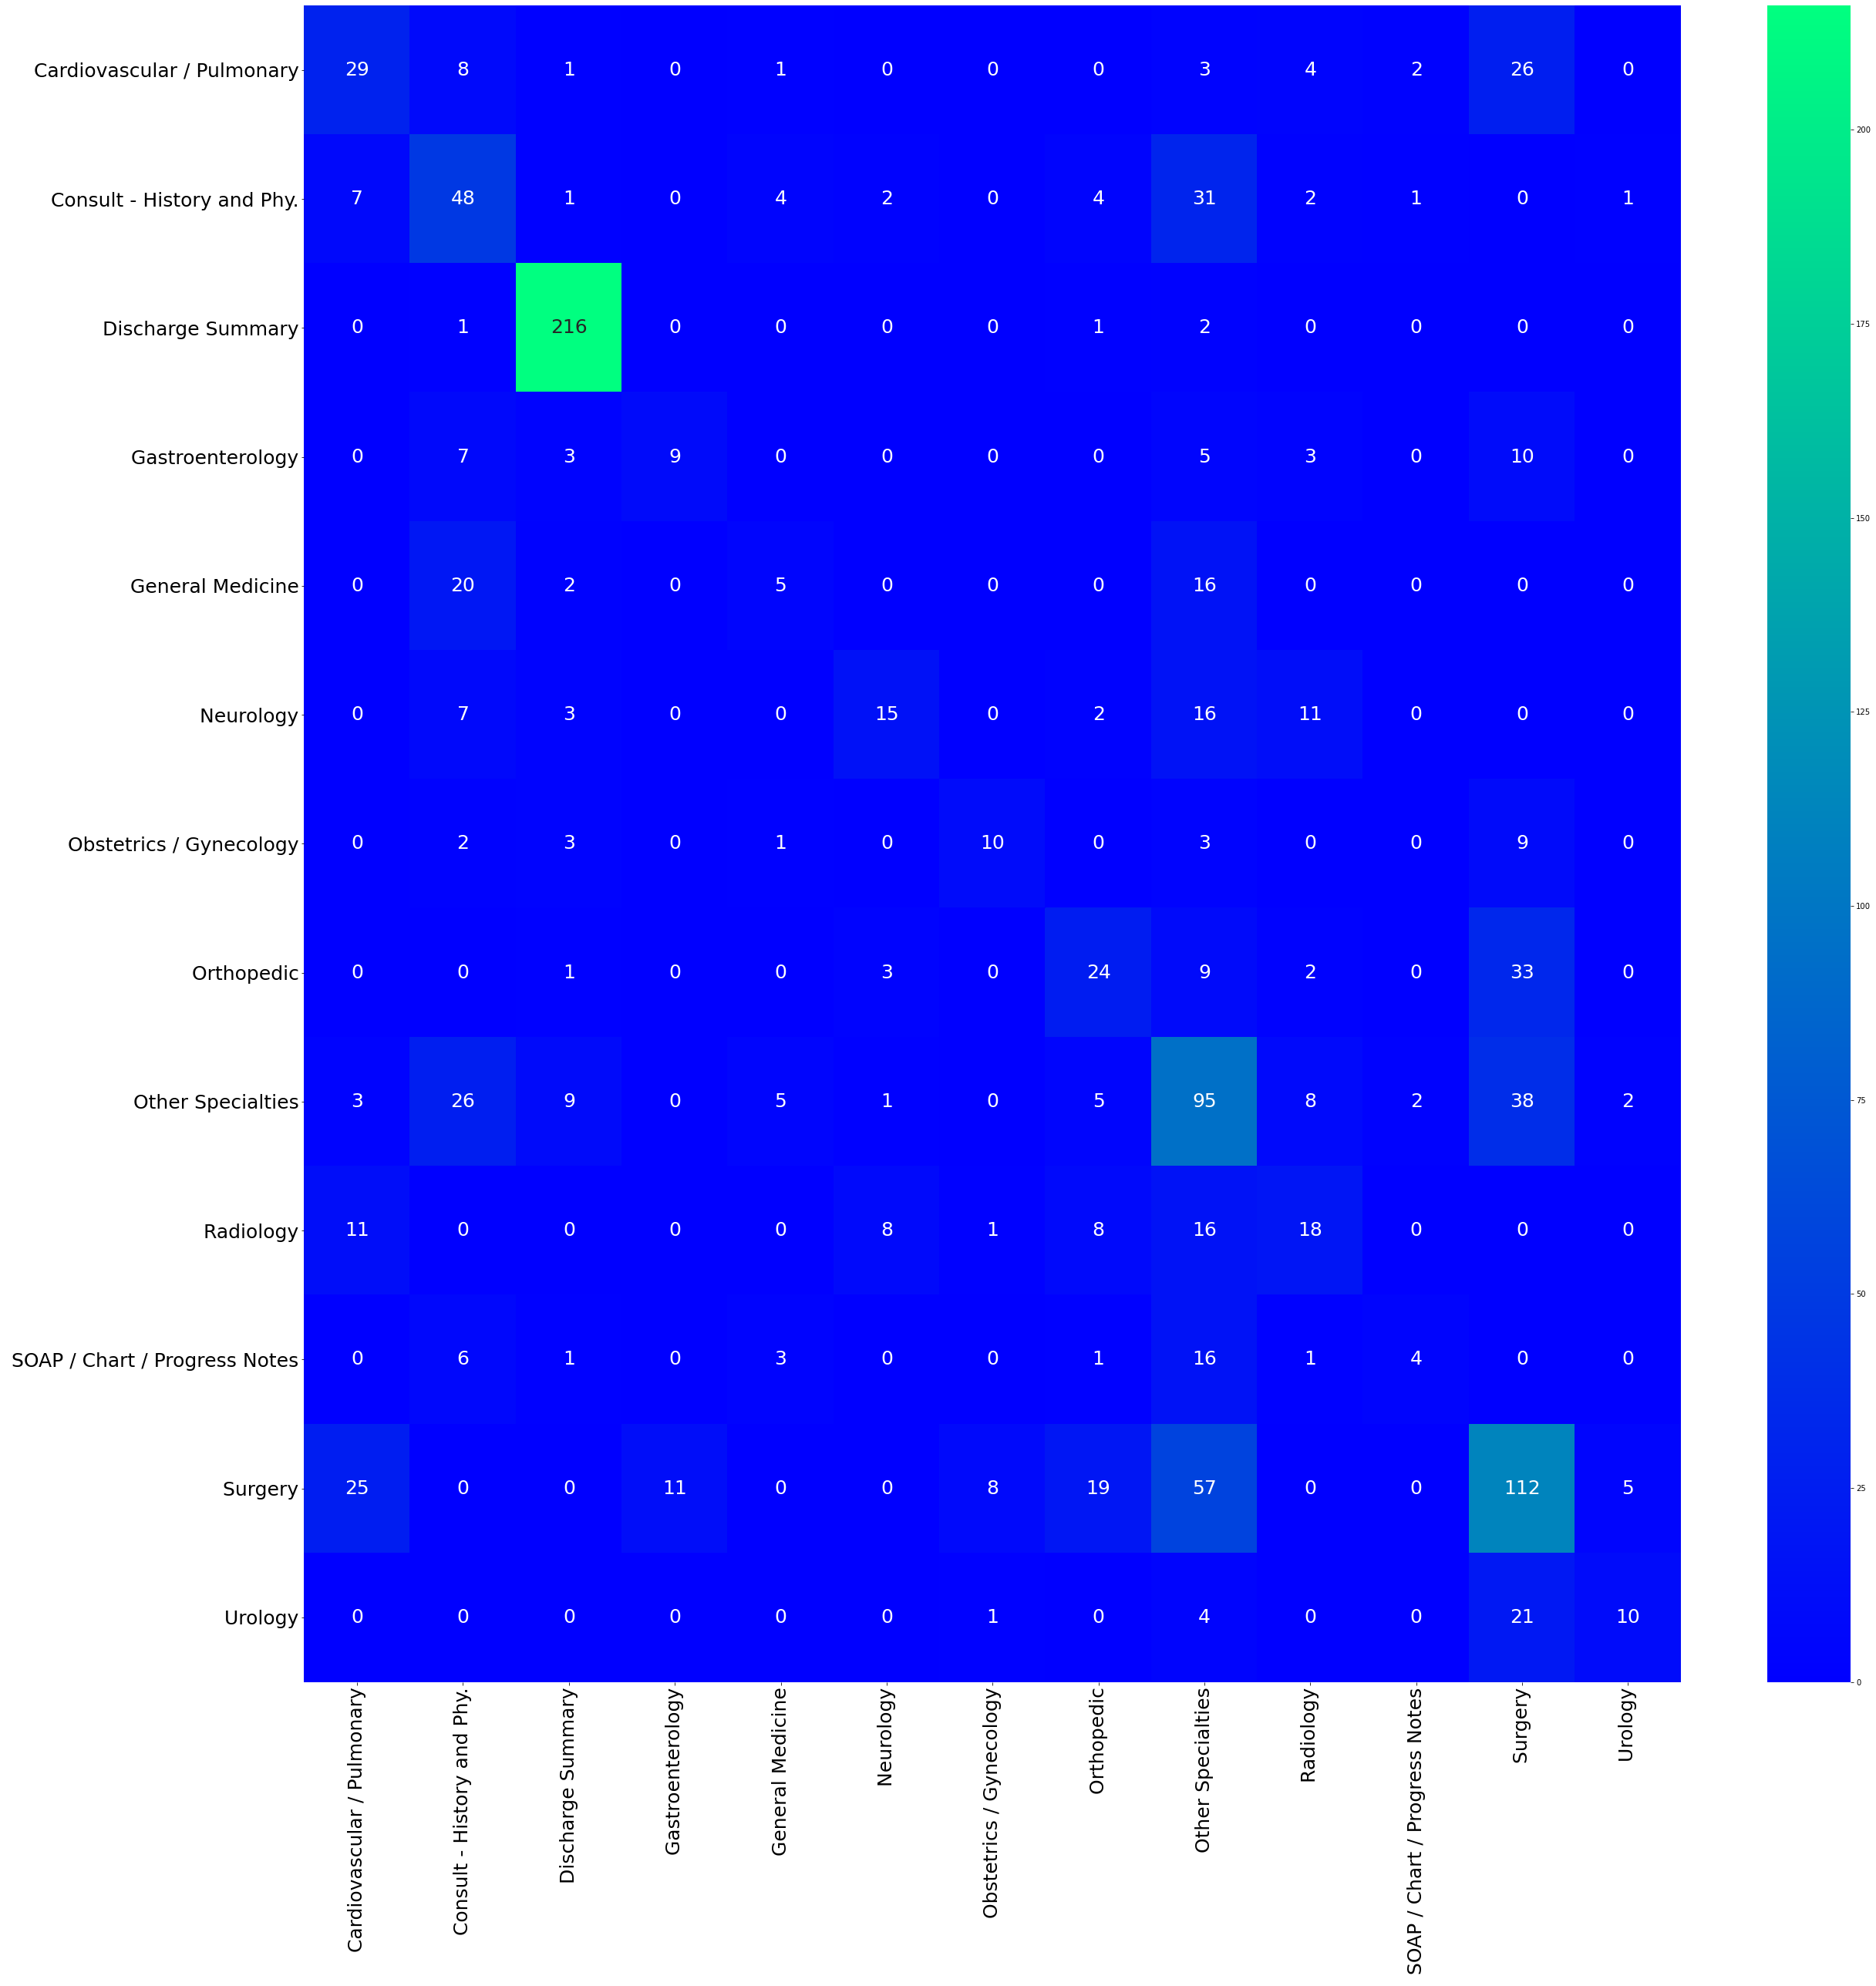

In [31]:
classes = [' Cardiovascular / Pulmonary',' Consult - History and Phy.', ' Discharge Summary',
           ' Gastroenterology',' General Medicine', ' Neurology',' Obstetrics / Gynecology',
           ' Orthopedic',' Other Specialties', ' Radiology', 
           ' SOAP / Chart / Progress Notes', ' Surgery',' Urology']
cm = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(figsize=(40, 40))
_ = sns.heatmap(cm, xticklabels=sorted(list(set(data_adj['medical_specialty']))), 
                yticklabels=sorted(list(set(data_adj['medical_specialty']))), 
                ax=ax, cmap=plt.cm.winter, annot=True, annot_kws={"fontsize":25}, fmt='d')
_ = plt.xticks(fontsize=25, rotation=90)
_ = plt.yticks(fontsize=25, rotation=0)
plt.show()

In [33]:
X, y = tfidf(data2, ngrams_u = 1)
X, y = smote_over_sample.fit_resample(X, y)
X_reduced = pca.fit_transform(X.todense())
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
smote_result = smote_result.append({'Preprocessing':'TF-IDF 1-gram, PCA, no class adjustment', 
                                'Model': 'Lasso LogReg',
                                'Precision': precision, 
                                'Recall': recall, 
                                'F1-score': f1, 
                                'Accuracy': accuracy}, ignore_index=True)

In [34]:
smote_result

,Preprocessing,Model,Precision,Recall,F1-score,Accuracy
0,TF-IDF 1-gram,Lasso LogReg,0.477190,0.487395,0.471495,0.487395
1,"TF-IDF 1-gram, PCA",Lasso LogReg,0.498658,0.500000,0.488556,0.500000
2,"TF-IDF 1-gram, PCA, no class adjustment",Lasso LogReg,0.483761,0.495041,0.468963,0.495041


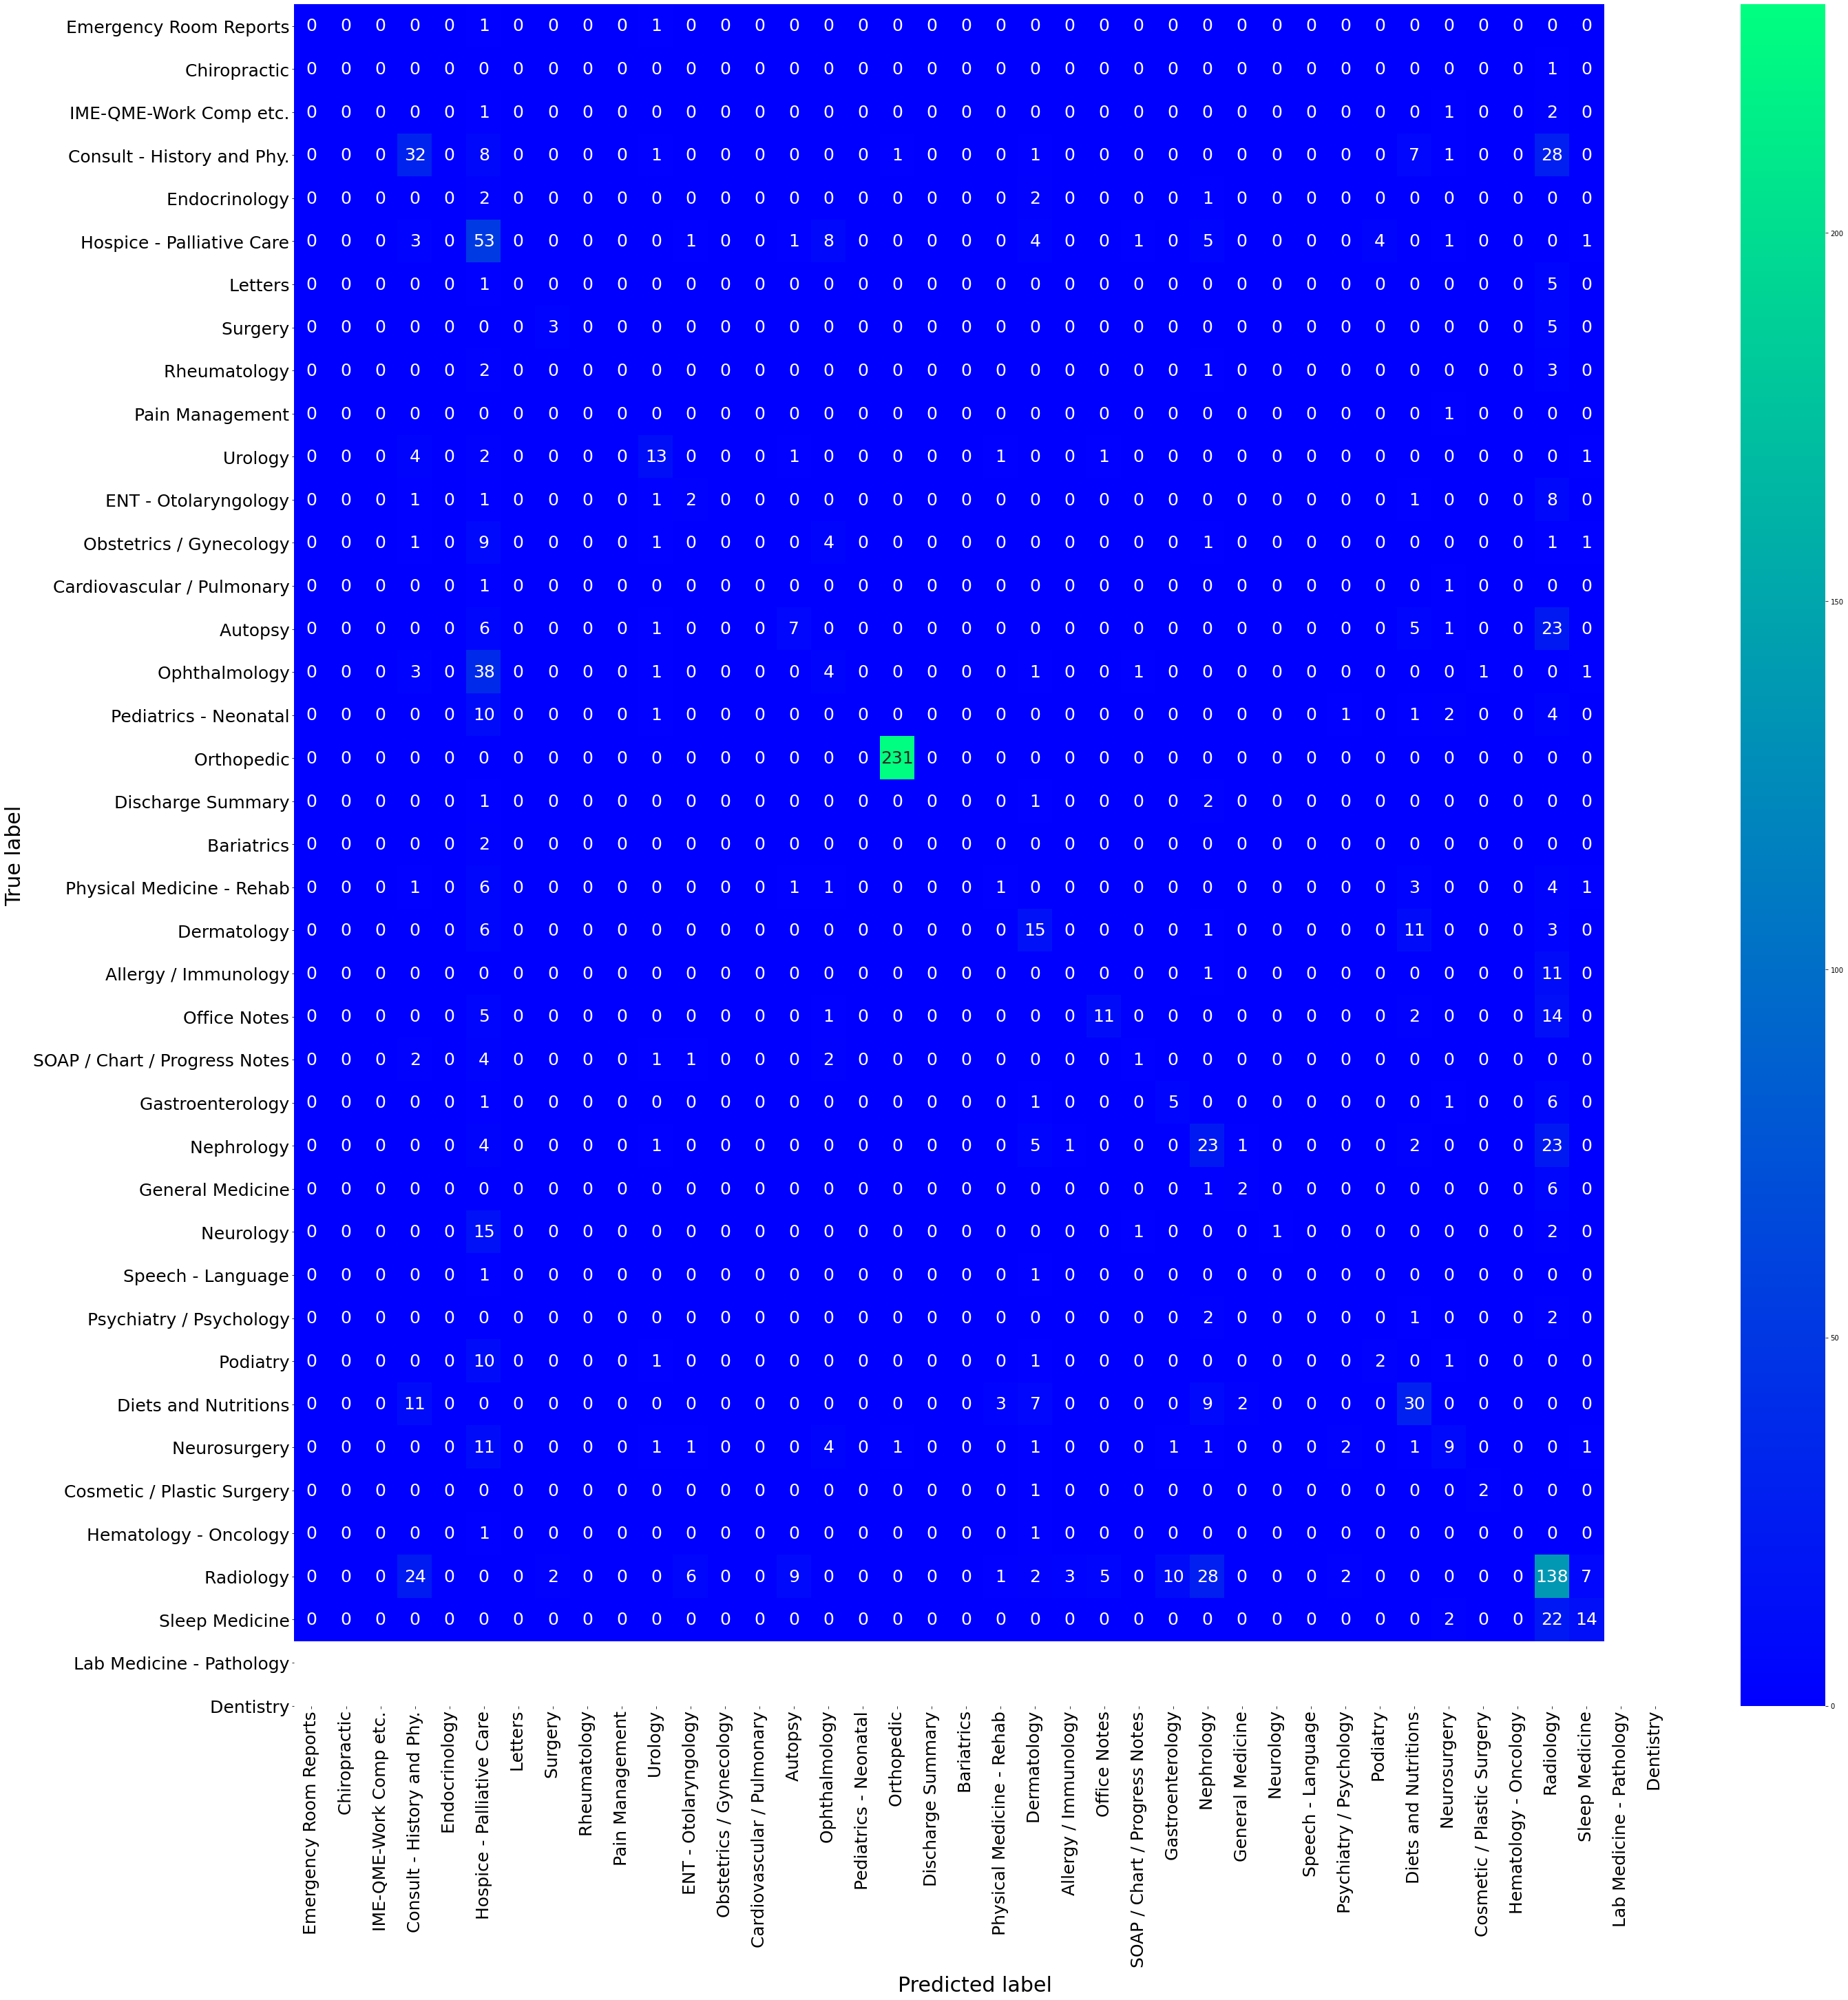

In [77]:
cm = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots(figsize=(40, 40))
_ = sns.heatmap(cm, ax=ax, xticklabels=list(set(labels['medical_specialty'])), 
                yticklabels=list(set(labels['medical_specialty'])), 
                cmap=plt.cm.winter, annot=True, annot_kws={"fontsize":25}, fmt='d')
_ = plt.xticks(fontsize=25, rotation=90)
_ = plt.yticks(fontsize=25, rotation=0)
_ = plt.tight_layout()
_ = plt.ylabel('True label', fontsize=30)
_ = plt.xlabel('Predicted label', fontsize=30)
plt.show()

In [43]:
sample1 = '''Allergic rhinitis, unspecified. 1. treat with Claritin and Flonase. May add Singulair if insufficient control. 2. Allergic rhinitis is characterized by paroxysms of sneezing, rhinorrhea, nasal obstruction, postnasal drainage, and itching of the eyes, nose, and palate.3. Wash nostrils with warm water or sinus rinses twice a day. 4. Use Claritin or Zyrtec at bedtime. Normal Saline nose drops PRN for itchy nose and congestion. 5. Nasal glucocorticoid sprays if prescribed to be used daily. Nasal sprays work best when they are used properly and the medication remains in the nose rather than draining down the back of the throat. If the nose is crusted or contains mucus, the patient can clean it with a saline nasal spray before a nasal spray that contains medication. The head should be positioned normally or with the chin slightly tucked. The spray should be directed away from the nasal septum (the cartilage that divides the two sides of the nose). After spraying, sniff gently to pull it into the higher parts of the nose. Avoid sniffing too hard, as this can result in the medicine draining down the throat. Some people find that holding one nostril closed with a finger improves their ability to draw the spray into the upper nose. Spit out any medicine that drains into the throat, since it is not effective unless it remains in the nose. The side effects of nasal steroids are mild and may include a mildly unpleasant smell or taste or drying of the nasal lining. In some people, nasal steroids cause irritation, crusting, and bleeding of the nasal septum, especially during the winter. Patients can minimize these problems by reducing the dose of the nasal steroid, applying a moisturizing nasal gel or spray to the septum before using the spray, or switching to a water-based (rather than an alcohol-based) spray. Education provided to patient and parent.'''
sample2 = '''Cardiac murmur, unspecified, HEART murmur: 1. Heart murmurs are common in infants and children. A heart murmur is an extra sound that doctors or nurses hear when they listen to the heart with a stethoscope. A heart murmur happens when the sound of blood flowing through the heart or blood vessels is loud enough to be heard. This can happen when the heart is normal. It can also happen when there is a change in the way the heart valves work or the way blood flows through the heart or blood vessels. 2. People with normal hearts and blood vessels can have heart murmurs. Doctors call these "innocent" heart murmurs. Innocent heart murmurs are not caused by a heart problem. 3. People of any age can have an innocent heart murmur. But innocent heart murmurs are especially easy to hear in people who are young, thin, or pregnant. Other heart murmurs are abnormal. These are caused by a heart condition. Common causes of abnormal heart murmurs are:Problems with the heart valves The heart valves can leak too much and let blood flow backward. Or they can get stuck and not open well; Heart problems that people are born with, such as a hole in one of the walls inside the heart. Murmurs detected in children beyond the age of one year often represent innocent murmurs but can also be produced by semilunar valve stenosis, atrioventricular valve regurgitation, or atrial septal defects. Other congenital heart lesions are unlikely to present at this age unless access to medical care was limited at an earlier age. A new murmur that occurs in a patient with a history of recent or frequent streptococcal pharyngitis may represent cardiac involvement with rheumatic fever. The doctor will decide if your child needs more testing or an evaluation by a cardiologist. 4. Body mass index (BMI) pediatric, 85th percentile to less than 95th percentile for age'''

In [61]:
test_text = pd.DataFrame(data={'transcription':[sample1, sample2], 'medical_specialty':[' Allergy / Immunology', ' Cardiovascular / Pulmonary'], 'class_label':[0,3]})

In [40]:
# load spacy
nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

# import nltk tokenizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import sent_tokenize

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [41]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def normalize_corpus(corpus, text_lemmatization=True, text_lower_case=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    normalized_corpus = []
    for doc in corpus:
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [59]:
def text_prepare(text):

    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(nltk.corpus.stopwords.words('english'))
    
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub('', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    
    return text

def preprocess(df):
    df_temp = df.copy()
    df_temp = df_temp.rename(index=str, columns={'transcription':'text'})
    
    df_temp.loc[:, 'text'] = normalize_corpus(df['transcription'], 
                                              text_lemmatization = False, 
                                              text_lower_case=False, 
                                              special_char_removal=False)
    df_temp.loc[:, 'text'] = [text_prepare(x) for x in df_temp['text'].values]
    
    tokenizer = ToktokTokenizer()
    
    df_temp['tokens'] = df_temp['text'].apply(tokenizer.tokenize)
    
    return df_temp


In [62]:
test_text = preprocess(test_text)
test_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               2 non-null      object
 1   medical_specialty  2 non-null      object
 2   class_label        2 non-null      int64 
 3   tokens             2 non-null      object
dtypes: int64(1), object(3)
memory usage: 80.0+ bytes


In [99]:
test_text = test_text.rename(columns={'transcription':'text'})
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_features=6048)
tfidf_vectorizer.fit(data2['text'])
X_t = tfidf_vectorizer.transform(test_text['text'])
y_t = test_text['class_label']
X_t_reduced = pca.fit_transform(X_t.todense())
y_pred_t = clf2.predict(X_t)
accuracy, precision, recall, f1 = get_metrics(y_t, y_pred_t)
print(f'Precision: {precision}\nRecall: {recall}\nF1-score: {f1}\nAccuracy: {accuracy}')

Precision: 0.0
Recall: 0.0
F1-score: 0.0
Accuracy: 0.0


In [100]:
sample_text = test_text.drop('tokens',axis=1)
predictions = pd.DataFrame(y_pred_t, columns=['Prediction'])
results = pd.concat([sample_text.reset_index(drop=True),predictions.reset_index(drop=True)],axis=1)
results['prediction_label'] = [labels[labels['class_label']==x]['medical_specialty'].values[0] for x in results['Prediction']]

In [101]:
results

,text,medical_specialty,class_label,Prediction,prediction_label
0,allergic rhinitis unspecified 1 treat claritin...,Allergy / Immunology,0,38,Surgery
1,cardiac murmur unspecified heart murmur 1 hear...,Cardiovascular / Pulmonary,3,38,Surgery


In [78]:
labels = data2[['medical_specialty','class_label']].drop_duplicates().sort_values('class_label').reset_index(drop=True)
labels

,medical_specialty,class_label
0,Allergy / Immunology,0
1,Autopsy,1
2,Bariatrics,2
3,Cardiovascular / Pulmonary,3
4,Chiropractic,4
5,Consult - History and Phy.,5
6,Cosmetic / Plastic Surgery,6
7,Dentistry,7
8,Dermatology,8
9,Diets and Nutritions,9
